<a href="https://colab.research.google.com/github/Arif9014/SupplyChainAnalytics/blob/main/Supplyipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Problem Statement 1 Data Set - Sheet1.csv to Problem Statement 1 Data Set - Sheet1.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Problem Statement 1 Data Set - Sheet1.csv')

In [ ]:
df.head()

,Order ID,Order Date,Region,Warehouse,Product Category,Supplier ID,Units Ordered,Units Delivered,Order Lead Time Days,Transportation Mode,Transportation Cost INR,Inventory Level Units,Stockout Flag,Delivery Status
0,ORD100000,2023-01-01 00:00:00,West,Mumbai,Electronics,SUP009,491,369,1,Air,10707,3833,0,Delayed
1,ORD100001,2023-01-01 01:00:00,Central,Hyderabad,Electronics,SUP013,419,226,6,Road,46422,8992,0,On-Time
2,ORD100002,2023-01-01 02:00:00,East,Kolkata,Fashion,SUP037,416,108,12,Rail,48759,5213,0,On-Time
3,ORD100003,2023-01-01 03:00:00,Central,Kolkata,Home Care,SUP014,338,115,3,Rail,46039,3105,0,On-Time
4,ORD100004,2023-01-01 04:00:00,Central,Hyderabad,Grocery,SUP037,366,432,4,Road,42443,4890,1,On-Time


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Order ID                 5000 non-null   object
 1   Order Date               5000 non-null   object
 2   Region                   5000 non-null   object
 3   Warehouse                5000 non-null   object
 4   Product Category         5000 non-null   object
 5   Supplier ID              5000 non-null   object
 6   Units Ordered            5000 non-null   int64 
 7   Units Delivered          5000 non-null   int64 
 8   Order Lead Time Days     5000 non-null   int64 
 9   Transportation Mode      5000 non-null   object
 10  Transportation Cost INR  5000 non-null   int64 
 11  Inventory Level Units    5000 non-null   int64 
 12  Stockout Flag            5000 non-null   int64 
 13  Delivery Status          5000 non-null   object
dtypes: int64(6), object(8)
memory usage: 547

In [ ]:
df.Warehouse.nunique()

5

In [ ]:
#Converting the object format to strings first
df['Order Date'] = df['Order Date'].astype("string")
df.head()
df['Order Date'].info()





<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Order Date
Non-Null Count  Dtype 
--------------  ----- 
5000 non-null   string
dtypes: string(1)
memory usage: 39.2 KB


In [ ]:
#Converting this string form into realtime date-time format to pandas to read it as date time
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date'].head()

,Order Date
0,2023-01-01 00:00:00
1,2023-01-01 01:00:00
2,2023-01-01 02:00:00
3,2023-01-01 03:00:00
4,2023-01-01 04:00:00


In [ ]:
#Adding features
df['Supply rate'] = df['Units Delivered']/df['Units Ordered']
print(df['Supply rate'].info())
df['Cost per unit'] = df['Transportation Cost INR'] / df['Units Delivered']
stock_region = df.groupby('Region')['Stockout Flag'].mean()
df['Delay Flag'] = (df['Delivery Status'] == 'Delayed').astype(int)
warehouse_region = df.groupby('Warehouse')['Stockout Flag'].mean()
df['Turnover Ratio']= df['Units Delivered'] /df['Inventory Level Units']
df

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Supply rate
Non-Null Count  Dtype  
--------------  -----  
5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB
None


,Order ID,Order Date,Region,Warehouse,Product Category,Supplier ID,Units Ordered,Units Delivered,Order Lead Time Days,Transportation Mode,Transportation Cost INR,Inventory Level Units,Stockout Flag,Delivery Status,Supply rate,Cost per unit,Delay Flag,Turnover Ratio
0,ORD100000,2023-01-01 00:00:00,West,Mumbai,Electronics,SUP009,491,369,1,Air,10707,3833,0,Delayed,0.751527,29.016260,1,0.096269
1,ORD100001,2023-01-01 01:00:00,Central,Hyderabad,Electronics,SUP013,419,226,6,Road,46422,8992,0,On-Time,0.539379,205.407080,0,0.025133
2,ORD100002,2023-01-01 02:00:00,East,Kolkata,Fashion,SUP037,416,108,12,Rail,48759,5213,0,On-Time,0.259615,451.472222,0,0.020717
3,ORD100003,2023-01-01 03:00:00,Central,Kolkata,Home Care,SUP014,338,115,3,Rail,46039,3105,0,On-Time,0.340237,400.339130,0,0.037037
4,ORD100004,2023-01-01 04:00:00,Central,Hyderabad,Grocery,SUP037,366,432,4,Road,42443,4890,1,On-Time,1.180328,98.247685,0,0.088344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD104995,2023-07-28 03:00:00,West,Mumbai,Electronics,SUP014,398,215,4,Road,33303,5760,0,On-Time,0.540201,154.897674,0,0.037326
4996,ORD104996,2023-07-28 04:00:00,West,Bengaluru,Grocery,SUP042,212,236,9,Rail,10696,7332,0,On-Time,1.113208,45.322034,0,0.032188
4997,ORD104997,2023-07-28 05:00:00,Central,Mumbai,Electronics,SUP042,276,362,10,Rail,46727,4993,1,On-Time,1.311594,129.080110,0,0.072502
4998,ORD104998,2023-07-28 06:00:00,West,Kolkata,Grocery,SUP010,481,187,8,Air,14812,1219,0,Delayed,0.388773,79.208556,1,0.153404


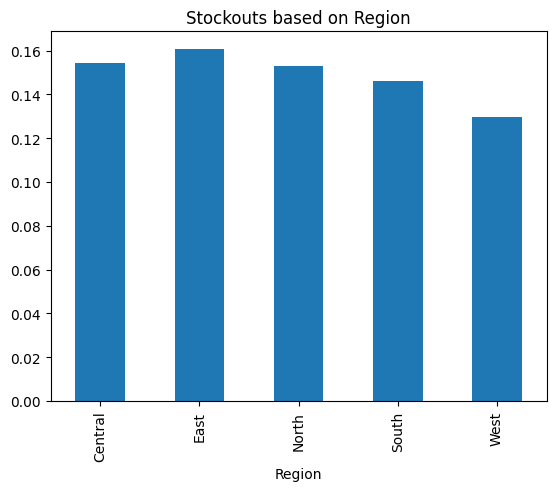

In [ ]:
#Plotting
stock_region.plot(kind='bar')
plt.title('Stockouts based on Region')
plt.show()


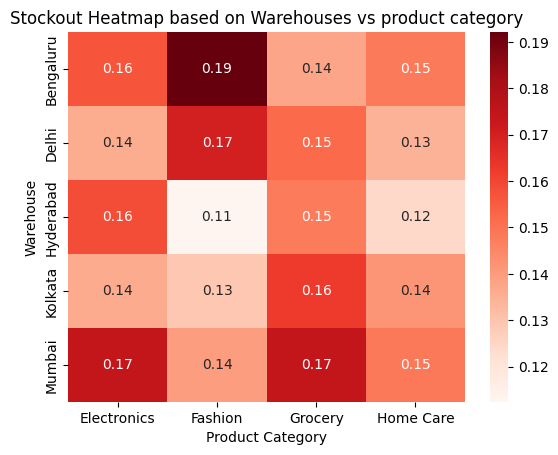

In [ ]:
pivot = pd.pivot_table(df,
                       values='Stockout Flag',
                       index='Warehouse',
                       columns='Product Category',
                       aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='Reds')
plt.title('Stockout Heatmap based on Warehouses vs product category')
plt.show()


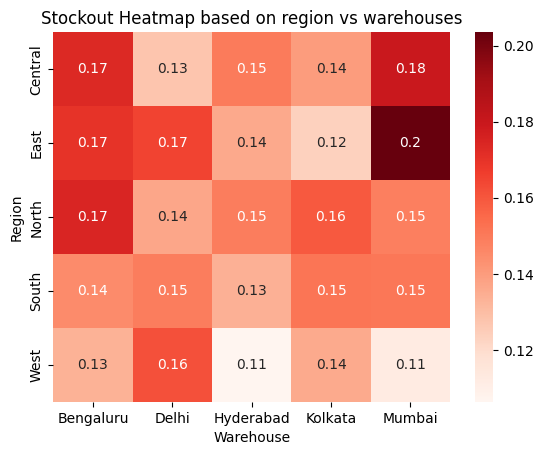

In [ ]:
pivot = pd.pivot_table(df,
                       values='Stockout Flag',
                       index='Region',
                       columns='Warehouse',
                       aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='Reds')
plt.title('Stockout Heatmap based on region vs warehouses')
plt.show()


In [ ]:
delay_rate_region = df.groupby("Region")["Delay Flag"].mean()
delay_rate_region.sort_values(ascending=False)


,Delay Flag
Region,
North,0.236506
Central,0.235352
South,0.234197
East,0.214649
West,0.212091


In [ ]:
tp=df.groupby("Transportation Mode")["Delay Flag"].mean()
tp.sort_values(ascending=False)


,Delay Flag
Transportation Mode,
Road,0.231261
Rail,0.226450
Air,0.221957


In [ ]:
kf = df.groupby("Warehouse")["Delay Flag"].mean()
kf.sort_values(ascending=False)



,Delay Flag
Warehouse,
Delhi,0.245136
Bengaluru,0.239583
Kolkata,0.222567
Hyderabad,0.220101
Mumbai,0.206470


In [ ]:
si = df.groupby("Supplier ID")["Delay Flag"].mean().head(10)
si.sort_values(ascending = False)

,Delay Flag
Supplier ID,
SUP001,0.270270
SUP009,0.243243
SUP002,0.240000
SUP005,0.217822
SUP010,0.192982
SUP003,0.172727
SUP007,0.171717
SUP008,0.168224
SUP004,0.166667


In [ ]:
ol = df.groupby("Delivery Status")["Order Lead Time Days"].mean()
ol.sort_values(ascending = False)



,Order Lead Time Days
Delivery Status,
Delayed,7.706973
On-Time,7.549522


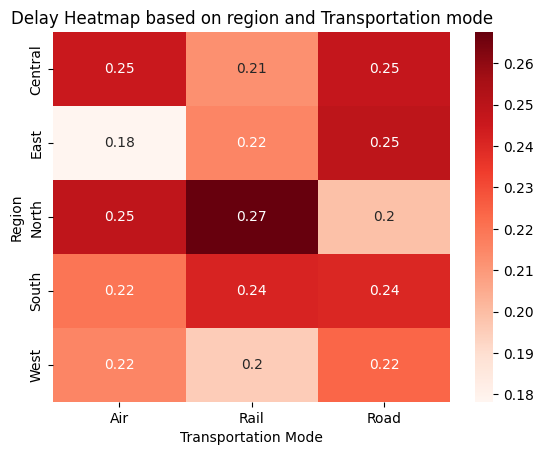

In [ ]:
pivot = pd.pivot_table(df,
                       values='Delay Flag',
                       index='Region',
                       columns='Transportation Mode',
                       aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='Reds')
plt.title('Delay Heatmap based on region and Transportation mode')
plt.show()

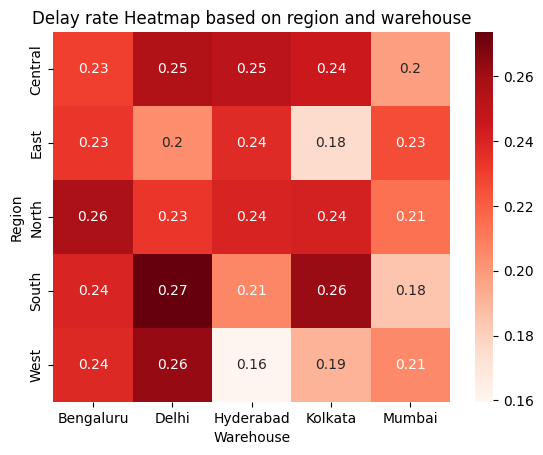

In [ ]:
pivot = pd.pivot_table(df,
                       values='Delay Flag',
                       index='Region',
                       columns='Warehouse',
                       aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='Reds')
plt.title('Delay rate Heatmap based on region and warehouse')
plt.show()

Text(0, 0.5, 'Supplier ID')

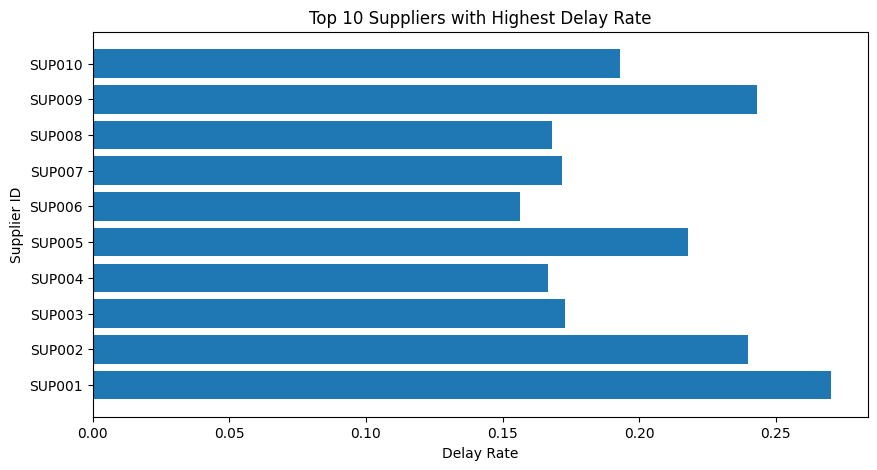

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(si.index, si.values)
plt.title('Top 10 Suppliers with Highest Delay Rate')
plt.xlabel('Delay Rate')
plt.ylabel('Supplier ID')




In [ ]:
supplier = df.groupby('Supplier ID').agg({
    'Order Lead Time Days':'mean',
    'Supply rate':'mean',
    'Delay Flag':'mean'
}).reset_index()

supplier.sort_values('Supply rate').head()


,Supplier ID,Order Lead Time Days,Supply rate,Delay Flag
42,SUP043,8.160494,1.257140,0.234568
8,SUP009,7.495495,1.564661,0.243243
37,SUP038,7.673469,1.570017,0.234694
29,SUP030,7.571429,1.603985,0.197802
31,SUP032,7.693069,1.636148,0.168317


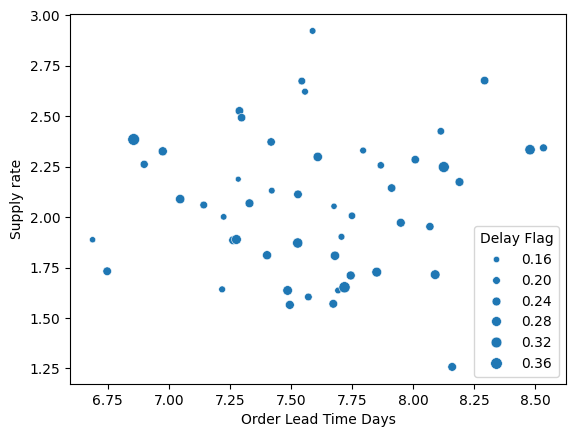

In [ ]:
sns.scatterplot(x='Order Lead Time Days',
                y='Supply rate',
                size='Delay Flag',
                data=supplier)
plt.show()


In [ ]:
df.groupby('Transportation Mode')['Cost per unit'].mean().sort_values()

,Cost per unit
Transportation Mode,
Air,240.881889
Rail,240.971060
Road,244.506712


In [ ]:
df.groupby('Region')['Cost per unit'].mean().sort_values()


,Cost per unit
Region,
Central,218.517177
West,226.269962
South,240.028794
East,262.975226
North,263.582230


<Axes: xlabel='Transportation Mode', ylabel='Cost per unit'>

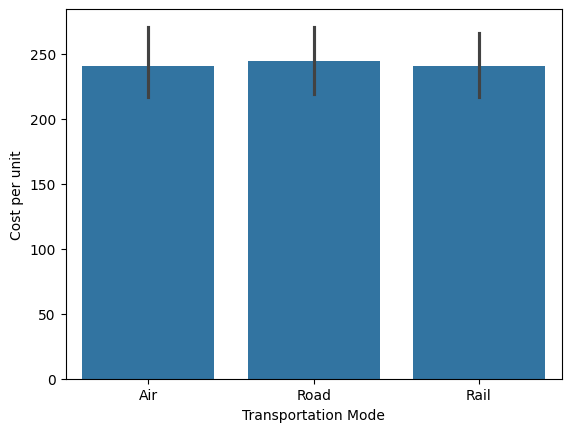

In [ ]:
sns.barplot(x='Transportation Mode', y='Cost per unit', data=df)


In [ ]:

df.groupby('Transportation Mode')['Delay Flag'].mean().sort_values()

,Delay Flag
Transportation Mode,
Air,0.221957
Rail,0.226450
Road,0.231261


In [ ]:

df.groupby('Transportation Mode')['Cost per unit'].mean().sort_values()

,Cost per unit
Transportation Mode,
Air,240.881889
Rail,240.971060
Road,244.506712


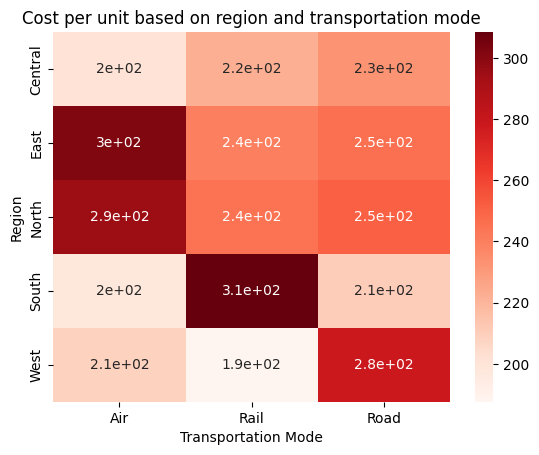

In [ ]:
pivot = pd.pivot_table(df,
                       values='Cost per unit',
                       index='Region',
                       columns='Transportation Mode',
                       aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='Reds')
plt.title('Cost per unit based on region and transportation mode')
plt.show()

In [ ]:
inventory_turnover = df.groupby('Product Category').agg({
    'Units Delivered':'sum',
    'Inventory Level Units':'mean'
})

inventory_turnover['Turnover Ratio'] = (
    inventory_turnover['Units Delivered'] /
    inventory_turnover['Inventory Level Units']
)

inventory_turnover.sort_values('Turnover Ratio')


,Units Delivered,Inventory Level Units,Turnover Ratio
Product Category,,,
Electronics,309011,5100.488710,60.584587
Fashion,309889,5054.505814,61.309456
Grocery,308143,4999.602564,61.633499
Home Care,334312,5125.871560,65.220518


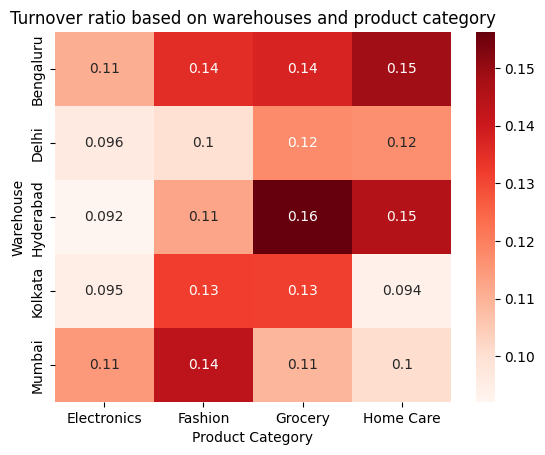

In [ ]:
pivot = pd.pivot_table(df,
                       values='Turnover Ratio',
                       index='Warehouse',
                       columns='Product Category',
                       aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='Reds')
plt.title(' based on warehouses and product category')
plt.show()

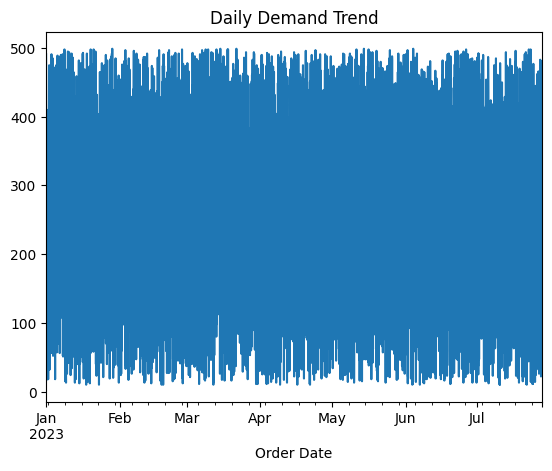

In [ ]:
daily = df.groupby('Order Date')['Units Ordered'].sum()

daily.plot()
plt.title('Daily Demand Trend')
plt.show()


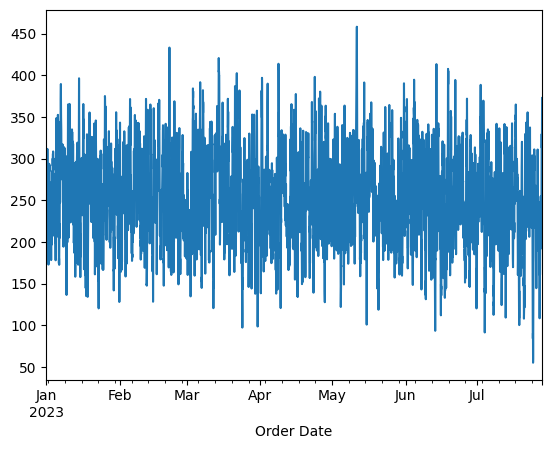

In [ ]:
daily.rolling(7).mean().plot()
plt.show()


In [ ]:
df['Month'] = df['Order Date'].dt.month
df['DayOfWeek'] = df['Order Date'].dt.dayofweek


In [ ]:
df_encoded = pd.get_dummies(df, columns=[
    'Region',
    'Warehouse',
    'Product Category',
    'Supplier ID',
    'Transportation Mode'
], drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Delivery Status', 'Delay Flag', 'Order ID', 'Order Date'], axis=1)
y = df_encoded['Delay Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[761   0]
 [239   0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       761
           1       0.00      0.00      0.00       239

    accuracy                           0.76      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.58      0.76      0.66      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


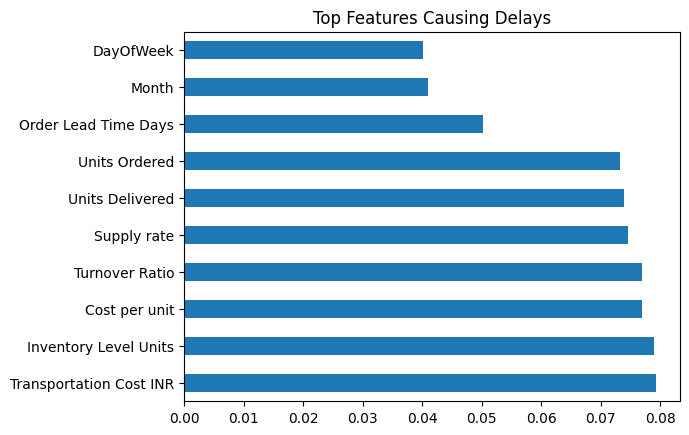

In [ ]:
import matplotlib.pyplot as plt
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top Features Causing Delays')
plt.show()


In [ ]:
daily_demand = df.groupby('Order Date')['Units Ordered'].sum()


In [ ]:
df['Daily Demand'] = df.groupby('Order Date')['Units Ordered'].transform('sum')
df['Demand Rolling 7'] = df['Daily Demand'].rolling(7).mean()


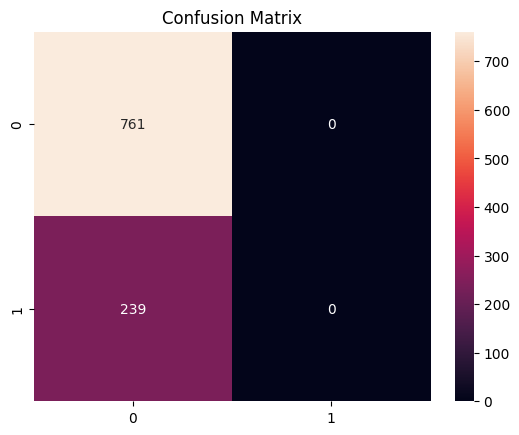

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
model = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = (y_probs > 0.3).astype(int)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))


[[672  89]
 [214  25]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       761
           1       0.22      0.10      0.14       239

    accuracy                           0.70      1000
   macro avg       0.49      0.49      0.48      1000
weighted avg       0.63      0.70      0.65      1000



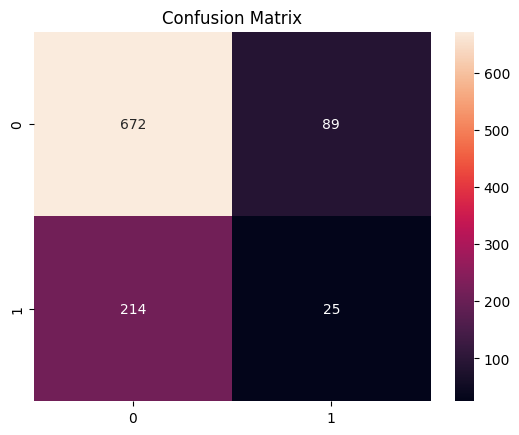

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = (y_probs > 0.2).astype(int)



In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

print(cm)

print(classification_report(y_test, y_pred))


[[672  89]
 [214  25]]
              precision    recall  f1-score   support

           0       0.80      0.39      0.52       761
           1       0.26      0.69      0.38       239

    accuracy                           0.46      1000
   macro avg       0.53      0.54      0.45      1000
weighted avg       0.67      0.46      0.49      1000



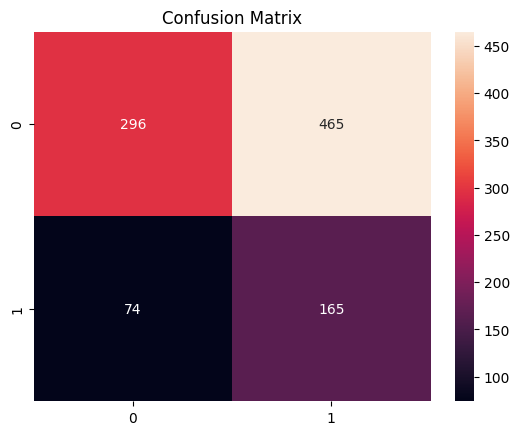

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
import numpy as np


In [ ]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos

scale_pos_weight


np.float64(3.4742729306487696)

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42
)


In [ ]:
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_probs = xgb_model.predict_proba(X_test)[:, 1]


In [ ]:
threshold = 0.25
y_pred = (y_probs > threshold).astype(int)


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.34      0.48       761
           1       0.26      0.72      0.38       239

    accuracy                           0.43      1000
   macro avg       0.53      0.53      0.43      1000
weighted avg       0.67      0.43      0.45      1000



In [ ]:
(df['Delay Flag'] == 0).sum()

np.int64(3867)

In [ ]:
(df['Delay Flag'] == 1).sum()

np.int64(1133)

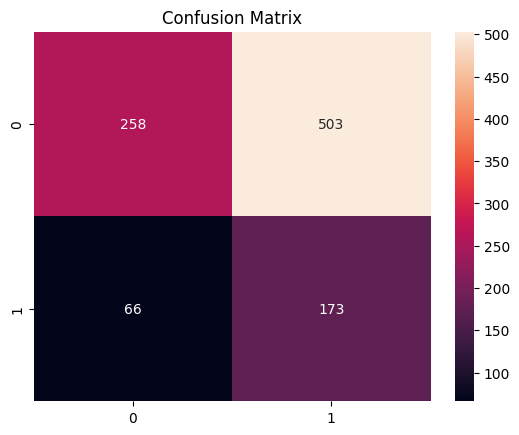

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
df.shape

(5000, 22)